## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold


from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Linear regression before feature selection

In [ ]:
# Load the dataset
file_path = 'cleaned_airline_data.csv'
df = pd.read_csv(file_path)

In [ ]:
X = df.drop("fare", axis=1).values
y = df['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# using SGD regressor model

SGD_reg = SGDRegressor(max_iter=100, penalty=None, alpha=0.001, eta0=0.1, early_stopping=True)
SGD_reg.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.001, early_stopping=True, eta0=0.1, max_iter=100,
             penalty=None)

In [ ]:
# calculating Mean sqaure error

mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train):.3f}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test):.3f}")

RMSE on the training data: 17.120

RMSE on the test data: 17.318


## SVM Linear kernal before feature selection

In [ ]:
X = df.drop("fare", axis=1).values
y = df['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the SVR model with a linear kernel
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"RMSE on the training data: {np.sqrt(mse_train):.3f}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test):.3f}")

RMSE on the training data: 17.558

RMSE on the test data: 17.728


## KNN before feature selection

In [ ]:
X = df.drop("fare", axis=1).values
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, model.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train):.3f}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test):.3f}")

RMSE on the training data: 20.269

RMSE on the test data: 22.545


## Linear Regression after feature selection

In [ ]:
X = df[['Year', 'citymarketid_2', 'nsmiles', 'passengers', 'large_ms','fare_lg', 'lf_ms', 'fare_low']]
y = df['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# using SGD regressor model

SGD_reg = SGDRegressor(max_iter=100, penalty=None, alpha=0.001, eta0=0.1, early_stopping=True)
SGD_reg.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.001, early_stopping=True, eta0=0.1, max_iter=100,
             penalty=None)

In [ ]:
# calculating Mean sqaure error

mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train):.3f}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test):.3f}")

RMSE on the training data: 17.084

RMSE on the test data: 17.264


In [ ]:
# grid search cv for SGDRegressor

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SGDRegressor
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 500, 1000],
    'eta0': [0.01, 0.1, 1]
}

# Initialize the SGDRegressor
sgd_reg = SGDRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best hyperparameters
best_sgd_reg = grid_search.best_estimator_
y_pred = best_sgd_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE on the test data with best hyperparameters: {np.sqrt(mse):.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best hyperparameters: {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 500, 'penalty': 'l1'}
Best score: -291.5919481900279
RMSE on the test data with best hyperparameters: 17.263


## SVM Linear Kernal after feature selection

In [ ]:
X = df[['Year', 'citymarketid_2', 'nsmiles', 'passengers', 'large_ms','fare_lg', 'lf_ms', 'fare_low']]
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the SVR model with a linear kernel
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"RMSE on the training data: {np.sqrt(mse_train):.3f}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test):.3f}")

RMSE on the training data: 17.562

RMSE on the test data: 17.737


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# using GridSearchCV for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}

random = RandomizedSearchCV(SVR(), param_grid, cv=2, scoring='neg_mean_squared_error')
random.fit(X_train_scaled, y_train)

print(random.best_params_)
print(random.best_estimator_)

print("Best hyperparameters:", random.best_params_)
print("Best score:", random.best_score_)

# Use the best estimator for predictions
best_svr_model = random.best_estimator_
y_test_pred_grid = best_svr_model.predict(X_test_scaled)
mse_test_grid = mean_squared_error(y_test, y_test_pred_grid)
print(f"RMSE on test data with best SVR model: {np.sqrt(mse_test_grid):.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'linear', 'gamma': 1, 'C': 1}
SVR(C=1, gamma=1, kernel='linear')
Best hyperparameters: {'kernel': 'linear', 'gamma': 1, 'C': 1}
Best score: -308.26391358465395
RMSE on test data with best SVR model: 17.737


## KNN after feature selection

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['Year', 'citymarketid_2', 'nsmiles', 'passengers', 'large_ms','fare_lg', 'lf_ms', 'fare_low']]
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, model.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train):.3f}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test):.3f}")

RMSE on the training data: 13.231

RMSE on the test data: 14.840


In [ ]:
# Define the parameter grid for KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values, adjust as needed
    'weights': ['uniform', 'distance'],  # Example values, adjust as needed
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Example values, adjust as needed
}

# Initialize the KNeighborsRegressor

knn_reg = KNeighborsRegressor()

# Create the GridSearchCV object

grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data

grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best hyperparameters

best_knn_reg = grid_search.best_estimator_
y_pred = best_knn_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE on the test data with best hyperparameters: {np.sqrt(mse):.3f}")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best score: -213.15163057914953
RMSE on the test data with best hyperparameters: 14.674


# Gradient Boost

Iteration 0: Cost 24468.427504077754
Iteration 100: Cost 3399.2442612772675
Iteration 200: Cost 649.4923630864672
Iteration 300: Cost 261.9084664089258
Iteration 400: Cost 200.97043449241892
Iteration 500: Cost 188.86491748745456
Iteration 600: Cost 185.46451611057867
Iteration 700: Cost 184.18068063485538
Iteration 800: Cost 183.61379555699597
Iteration 900: Cost 183.34654138231787


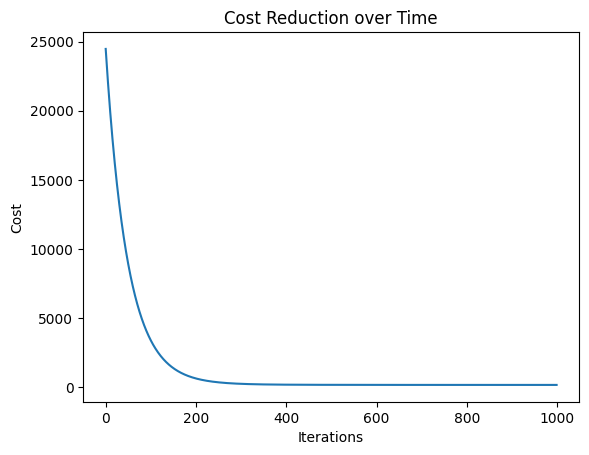

Mean Squared Error on Test Set: 373.97
Predicted Future Fare: $250.93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Select features and target variable
features = ['Year', 'quarter', 'nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms']
target = 'fare'

X = df[features]
y = df[target]

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term to features
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Gradient Descent Parameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
m = len(y_train)  # Number of training examples

# Initialize theta (weights)
theta = np.zeros((X_train.shape[1], 1))

# Cost function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1/(2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha/m) * X.T.dot(errors)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Plot cost history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction over Time')
plt.show()

# Evaluate model on the test set
def predict(X, theta):
    return X.dot(theta)

y_pred = predict(X_test, theta)

# Calculate mean squared error on test set
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# Example future prediction
# Provide new input values (e.g., for future years and routes)
new_data = np.array([2025, 2, 1000, 150, 0.5, 250, 0.4])  # Example input
new_data_scaled = scaler.transform([new_data])  # Scale input
new_data_scaled = np.c_[np.ones(new_data_scaled.shape[0]), new_data_scaled]  # Add intercept
future_fare_prediction = predict(new_data_scaled, theta)
print(f"Predicted Future Fare: ${future_fare_prediction[0][0]:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 

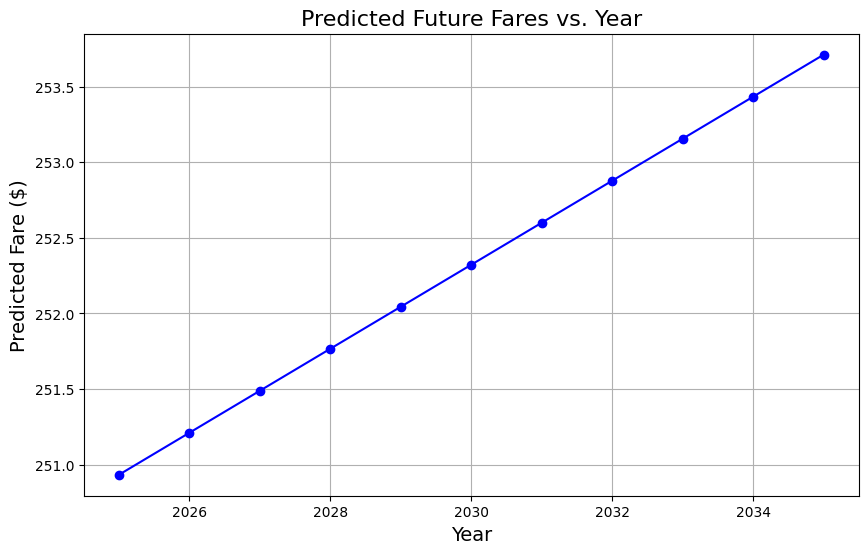

In [ ]:
# Assuming `theta` and `scaler` have been trained from previous steps

# Define future years and simulate predictions
future_years = np.arange(2025, 2036)  # Future years from 2025 to 2035
predicted_fares = []

# Keep other features constant for simplicity
quarter = 2
nsmiles = 1000
passengers = 150
large_ms = 0.5
fare_lg = 250
lf_ms = 0.4

for year in future_years:
    # Create input for each year
    new_data = np.array([year, quarter, nsmiles, passengers, large_ms, fare_lg, lf_ms])
    new_data_scaled = scaler.transform([new_data])  # Scale input
    new_data_scaled = np.c_[np.ones(new_data_scaled.shape[0]), new_data_scaled]  # Add intercept
    future_fare_prediction = new_data_scaled.dot(theta)
    predicted_fares.append(future_fare_prediction[0][0])

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_fares, marker='o', linestyle='-', color='b')
plt.title('Predicted Future Fares vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Fare ($)', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# Predictions on the test set
y_pred = X_test.dot(theta)  # Use your trained model's weights (theta)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 12.28
Mean Squared Error (MSE): 373.97
Root Mean Squared Error (RMSE): 19.34
R² Score: 0.91


# Random Forest

Random Forest Model Training BEFORE Feature Selection with Grid Search
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters BEFORE Feature Selection: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 75}
Train RMSE BEFORE: 9.27419295283168, Test RMSE BEFORE: 13.394570428074962
Train R² BEFORE: 0.980008069845655, Test R² BEFORE: 0.9579530057291933
Selected Features: ['nsmiles', 'fare_lg', 'lf_ms', 'fare_low']
Random Forest Model Training AFTER Feature Selection with Grid Search
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters AFTER Feature Selection: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 75}
Train RMSE AFTER: 10.82476987781527, Test RMSE AFTER: 14.76017318583888
Train R² AFTER: 0.9727642200747548, Test R² AFTER: 0.9489424134741782


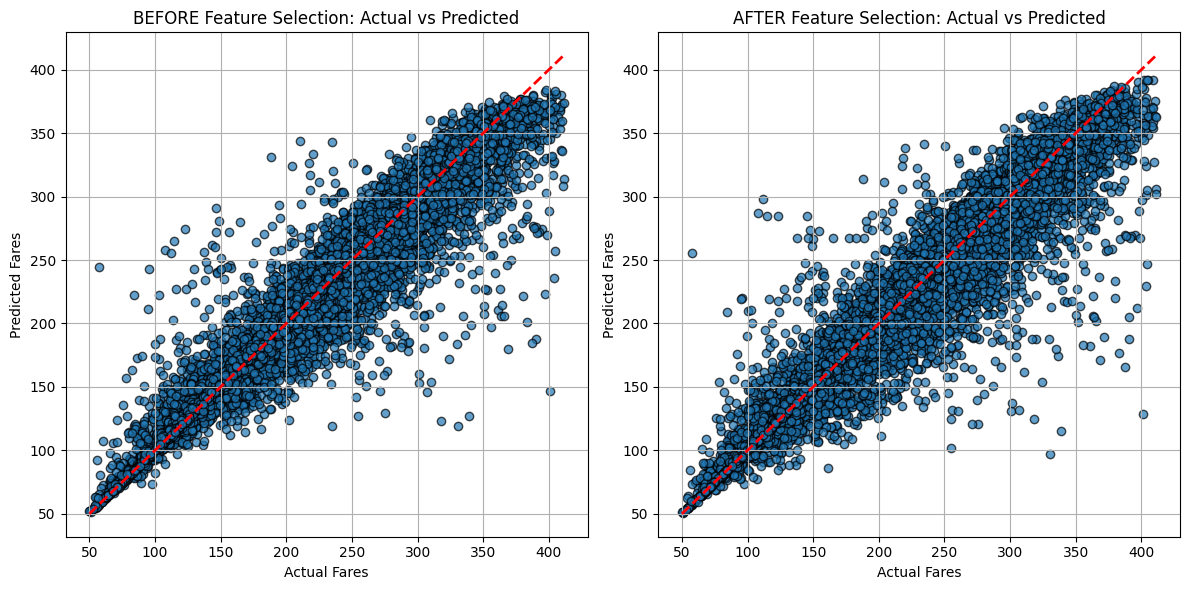

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

# Load your dataset
data = pd.read_csv('cleaned_airline_data.csv')

selected_features = ['Year', 'nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']  # Customize as needed
target_variable = 'fare'

X = data[selected_features]
y = data[target_variable]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Grid Search Parameters ---
param_grid = {
    'n_estimators': [50, 75],
    'max_depth': [10, 15],
    'max_features': ['sqrt', 'log2']
}

# --- Random Forest Model Training with Grid Search BEFORE Feature Selection ---
print("Random Forest Model Training BEFORE Feature Selection with Grid Search")
rf_before = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search
grid_search_before = GridSearchCV(
    estimator=rf_before,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # Use 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit Grid Search
grid_search_before.fit(X_train, y_train)

# Get Best Parameters and Train the Best Model
best_params_before = grid_search_before.best_params_
rf_before_best = grid_search_before.best_estimator_

print("Best Parameters BEFORE Feature Selection:", best_params_before)

# Predictions and Metrics Before Feature Selection
y_train_pred_before = rf_before_best.predict(X_train)
y_test_pred_before = rf_before_best.predict(X_test)

rmse_train_before = np.sqrt(mean_squared_error(y_train, y_train_pred_before))
rmse_test_before = np.sqrt(mean_squared_error(y_test, y_test_pred_before))
r2_train_before = r2_score(y_train, y_train_pred_before)
r2_test_before = r2_score(y_test, y_test_pred_before)

print(f"Train RMSE BEFORE: {rmse_train_before}, Test RMSE BEFORE: {rmse_test_before}")
print(f"Train R² BEFORE: {r2_train_before}, Test R² BEFORE: {r2_test_before}")

# --- Feature Selection ---
# Select important features using the best model before feature selection
selector = SelectFromModel(rf_before_best, threshold='median')
selector.fit(X_train, y_train)

# Transform datasets to include only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

# --- Random Forest Model Training with Grid Search AFTER Feature Selection ---
print("Random Forest Model Training AFTER Feature Selection with Grid Search")
rf_after = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search
grid_search_after = GridSearchCV(
    estimator=rf_after,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # Use 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit Grid Search
grid_search_after.fit(X_train_selected, y_train)

# Get Best Parameters and Train the Best Model
best_params_after = grid_search_after.best_params_
rf_after_best = grid_search_after.best_estimator_

print("Best Parameters AFTER Feature Selection:", best_params_after)

# Predictions and Metrics After Feature Selection
y_train_pred_after = rf_after_best.predict(X_train_selected)
y_test_pred_after = rf_after_best.predict(X_test_selected)

rmse_train_after = np.sqrt(mean_squared_error(y_train, y_train_pred_after))
rmse_test_after = np.sqrt(mean_squared_error(y_test, y_test_pred_after))
r2_train_after = r2_score(y_train, y_train_pred_after)
r2_test_after = r2_score(y_test, y_test_pred_after)

print(f"Train RMSE AFTER: {rmse_train_after}, Test RMSE AFTER: {rmse_test_after}")
print(f"Train R² AFTER: {r2_train_after}, Test R² AFTER: {r2_test_after}")

# --- Visualization: Before vs After Feature Selection ---
# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_before, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('BEFORE Feature Selection: Actual vs Predicted')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_after, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('AFTER Feature Selection: Actual vs Predicted')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.grid(True)
plt.tight_layout()
plt.show()